# COGS 108 - Final Project 

# Overview

We want to study the effect between weather conditions and traffic accidents and how accurate our predictor model can be for predicting severity of traffic accidents from weather conditions. In our project, we used K-Nearest Neighbor and Decision Tree algorithms to analyze how well different weather condition factors such as precipitation, temperature, and humidity predict severity of traffic accidents. From our research, we have found out that weather conditions could predict the severity of an accident to a ceratin degree, with some factors weighing in more than others. Our model could predict the severity with 76.58% accuracy on our test data after training the model (using the 80-20 split on traffic accident data for training and testing).


# Names

- Wonsuk Jang	
- Jianing Zhang	
- Kevin Jeong	
- Kevin Resler	
- Bao Hoang	


# Research Question

How accurately can we predict the severity of a traffic accident in the US given basic weather information (temperature, humidity, air pressure, visibility, wind speed, and precipitation)?


## Background and Prior Work

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Americans live on cars. It is not unheard of for people to commute hours for work or daily events. Unfortunately, traffic accidents injure millions and even kill thousands of Americans each year. In 2018, nearly 40000 people passed away and another 3 million people were injured enough to receive medical attention. That means nearly 10000 accidents happen and around a hundred beautiful lives are taken away on a daily basis. Although cars are getting smarter and safer, pedestrians, bikers and passengers are still exposed to dangers. A close friend of ours almost ran over another student on campus this school year. Luckily, the car was moving slow so there were no injuries.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As illustrated in our example, many factors can lead to traffic accidents, some of which could be avoided: according to Driver Knowledge, 1 out of 4 accidents are due to phone distraction when driving. However, fast driver reaction times could only do so much to avoiding accidents. There are a lot more factors to consider in traffic accidents and even the most focused driver could not totally avoid these risks. According to NACTO (National Association of City Transportation Officials), once cars reach above 45mph, it takes a longer distance for the car to stop than the distance which drivers react from perception. However, all of this is assuming the driver could effectively stop the vehicle under ideal conditions. Many drivers on the road are not capable of such braking skills and their cars cannot reach such performance even on dry roads. In wet tarmac, tires tend to lose grip and hydroplane, leaving the driver a short amount of time to correct the car. Another example is fog, seeing heavy fog on roads and highways is a quite common scene in San Diego. Without fog lights, which often costs extra to be equipped on a car, the driver’s visibility is severely affected and leads to greater risks of traffic accidents. (US Department of Transportation Federal Highway Administration).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As evidenced by the difficulties created by adverse weather conditions in driving, there are in fact various researches done on the effect of adverse weather conditions on traffic accidents. In a research paper done by Yue Liu of University of Maryland, Liu states that adverse weather conditions such as wind speed and humidity has had a significant impact on increase in the severity of traffic accidents (Liu). Likewise, another research done by Tom Brijs of Hassle University has also found a correlation between adverse weather condition factors such as humidity and wind speed and traffic accident severity (Brijs). Together, these research papers have led us to explore and hypothesize how accurately we can predict the severity of traffic accidents from various weather conditions from our dataset. We believe that exploring our research topic can be important as our results can help others better understand how different weather conditions can affect the severity of traffic accidents and warn them about the dangers of adverse weather conditions in driving.


References (include links):
- 1) https://www.driverknowledge.com/car-accident-statistics/
- 2) https://distracteddriveraccidents.com/25-shocking-distracted-driving-statistics/
- 3) https://weather.com/safety/winter/news/weather-fatalities-car-crashes-accidents-united-states
- 4) https://nacto.org/docs/usdg/vehicle_stopping_distance_and_time_upenn.pdf
- 5) https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm
- 6) https://drum.lib.umd.edu/bitstream/handle/1903/14263/Liu_umd_0117N_14019.pdf;jsessionid=F68F5AE9E6BB13E68122C00E8A655D70?sequence=1
- 7) http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.151.3435&rep=rep1&type=pdf

# Hypothesis


Our hypothesis is that weather conditions could predict severity of traffic accidents very well. As discussed above, since bad weather conditions negatively affect vehicle performance and drivers’ reaction; we expect there to be a close correlation between the weather and the severity of accidents. Some accidents could be avoided to an extent with safer cars and more focused drivers, thus, we believe there is a direct linkage between weather and traffic accidents.


# Dataset(s)

- Dataset Name: US_Accidents_Dec19.csv
- Link to the dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents
- Number of observations: around 1 million observations on traffic accidents

This dataset contains the traffic accidents information in the US from 2016 to 2019. It shows the severity of the accident, the weather condition, time, location, wind speed, etc. This is close, if not definitely, the most detailed and unbiased dataset we can find. First and foremost, the dataset is well organized with an enormous amount of detailed data. A detailed dataset leaves us plenty of room for us to work on and carry analysis. Each entry includes geographical location, timestamps as well as weather conditions. Judging from the timestamps, the entries cover more than 3 years so season shouldn’t be an affecting factor. And since the data is collected from all around the U.S. geographical location bias is removed as well. It could be that snowy areas like Maine have more accidents than southern California.


# Setup

After downloading our dataset from Kaggle, we decided to use popular data science related libraries such as numpy, pandas for data organization; matplotlib and graphviz for data visualization and sklearn for KNN.


In [2]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

import seaborn as sns
sns.set(style="white", font_scale=1.5)

from sklearn import neighbors, datasets
from sklearn import tree
from sklearn.metrics import classification_report, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")

# to convert ISO string to python datetime
from datetime import datetime

In [3]:
# Columns we want to keep
keep =['Severity', 'Start_Time','Timezone','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']

# Load the dataset
df = pd.read_csv('US_Accidents_Dec19.csv',usecols=keep)

In [4]:
# Check the data
df.head()

,Severity,Start_Time,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,2016-02-08 05:46:00,US/Eastern,36.9,91.0,29.68,10.0,NaN,0.02
1,2,2016-02-08 06:07:59,US/Eastern,37.9,100.0,29.65,10.0,NaN,0.00
2,2,2016-02-08 06:49:27,US/Eastern,36.0,100.0,29.67,10.0,3.5,NaN
3,3,2016-02-08 07:23:34,US/Eastern,35.1,96.0,29.64,9.0,4.6,NaN
4,2,2016-02-08 07:39:07,US/Eastern,36.0,89.0,29.65,6.0,3.5,NaN


# Data Cleaning

The data set we have had 49 columns of detailed information regarding millions of accidents, but to make our data leaner, we only kept the columns that were of interest to us.

- Severity:Severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic 
- Start_Time:Start time of the accident in local time zone.
- Timezone: Timezone based on the location of the accident (eastern, central, etc.).
- Temperature(F):The temperature (in Fahrenheit).
- Humidity(%):  The humidity (in percentage).
- Pressure(in): The air pressure (in inches).
- Visibility(mi): Visibility (in miles).
- Weather_Condition: The weather condition (rain, snow, thunderstorm, fog, etc.).
- Wind_Speed(mph): Wind speed (in miles per hour).
- Precipitation(in): Precipitation amount in inches, if there is any.


In [5]:
# Drop all the NaN columns and reset the index
df = df.dropna().reset_index(drop=True)

In [6]:
# Check how many timezone we have 
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

We see that there are multiple timezone so we want to just convert them into UTC timezone

In [7]:
# Function to standardize timezone
def standardizeTime(timestamp, timezone):
    if (timezone == 'US/Eastern'):
        timestamp += '-04:00'
    elif (timezone == 'US/Central'):
        timestamp += '-05:00'
    elif (timezone == 'US/Mountain'):
        timestamp += '-06:00'
    elif (timezone == 'US/Pacific'):
        timestamp += '-07:00'
    return datetime.fromisoformat(timestamp)

In [8]:
# Apply the function to df
df['Time(UTC)'] = df.apply(lambda data: standardizeTime(data.Start_Time, data.Timezone), axis=1)

After we have the 'Time(UTC)' column, we do not need other time column so we got rid of them

In [9]:
df = df.drop(['Timezone','Start_Time'],axis=1)

In [10]:
# Check the head again to see the data
df.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Time(UTC)
0,3,37.9,97.0,29.63,7.0,3.5,0.03,2016-02-08 07:44:26-04:00
1,3,37.4,100.0,29.62,3.0,4.6,0.02,2016-02-08 08:10:04-04:00
2,3,37.4,100.0,29.62,3.0,4.6,0.02,2016-02-08 08:21:27-04:00
3,2,37.4,100.0,29.62,3.0,4.6,0.02,2016-02-08 08:39:43-04:00
4,2,33.8,100.0,29.62,2.0,4.6,0.01,2016-02-08 10:11:15-04:00


# Data Analysis & Results

At first, we planned to use Linear Regression to predict the severity. However, the graphs show that none of the factors (Temparature, Humidity, etc) have a linear relationship with the serverity. Therefore, we decided that linear regression is not a good method for analyzing this data set.

Text(0.5, 1.0, 'Severity and Humidity')

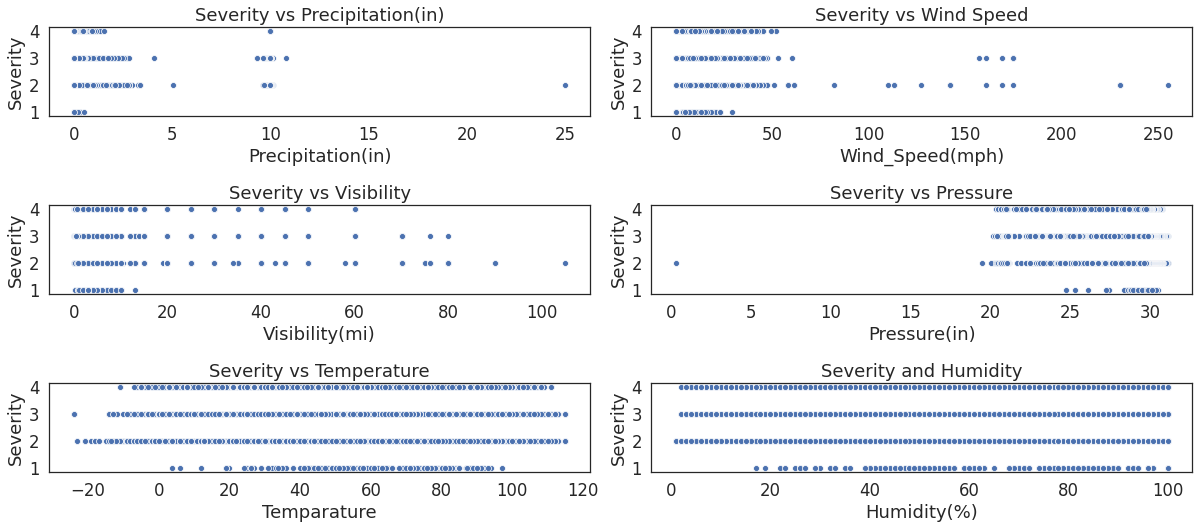

In [11]:
# Plots that show the relationship between severity with other factors such as temperature, humidity, etc
plt.figure()
plt.subplots_adjust(bottom=0.1)
yint = range(1,5)

# Severity vs Precipitation(in)
plt.subplot(3,2,1)
sns.scatterplot(x='Precipitation(in)', y='Severity', data=df)
plt.yticks(yint)
plt.ylabel('Severity');
plt.xlabel('Precipitation(in)');
plt.title('Severity vs Precipitation(in)')

# Severity vs Wind Speed
plt.subplot(3,2,2)
sns.scatterplot(x='Wind_Speed(mph)', y='Severity', data=df)
plt.yticks(yint)
plt.ylabel('Severity');
plt.xlabel('Wind_Speed(mph)');
plt.title('Severity vs Wind Speed')
plt.tight_layout()

# Severity vs Visibility
plt.subplot(3,2,3)
sns.scatterplot(x='Visibility(mi)', y='Severity', data=df)
plt.yticks(yint)
plt.ylabel('Severity');
plt.xlabel('Visibility(mi)');
plt.title('Severity vs Visibility')
plt.tight_layout()

# Severity vs Pressure
plt.subplot(3,2,4)
sns.scatterplot(x='Pressure(in)', y='Severity', data=df)
plt.yticks(yint)
plt.ylabel('Severity');
plt.xlabel('Pressure(in)');
plt.title('Severity vs Pressure')

# Severity vs Temperature
plt.subplot(3,2,5)
sns.scatterplot(x='Temperature(F)', y='Severity', data=df)
plt.yticks(yint)
plt.ylabel('Severity');
plt.xlabel('Temparature');
plt.title('Severity vs Temperature')

# Severity and Humidity
plt.subplot(3,2,6)
sns.scatterplot(x='Humidity(%)', y='Severity', data=df)
plt.yticks(yint)
plt.ylabel('Severity');
plt.xlabel('Humidity(%)');
plt.title('Severity and Humidity')

Since we cannot use linear regression to predict the serverity, we decided to look for alternative approachs. The two approaches that we decided on were K-Nearest Neighbor and Decision Tree Classification since we are trying to catergorize the weather condition into each severity level.
We also split the data following the 80:20 percent rule, so we only 80% of this dataset to training and the other 20% to test

In [12]:
# Splitting data into training and testing sets
ratio = .8
data_size = len(df.index)
training_data_size = int(data_size * ratio)

training_X = df.iloc[:training_data_size,1:7]
training_y = df.iloc[:training_data_size].Severity

testing_X = df.iloc[training_data_size:,1:7]
testing_y = df.iloc[training_data_size:].Severity

### K Nearest Neighbors

With the K Nearest Neighbor approach, there are 2 ways to decide the weight of the neighbors, uniform and distance, so we decided to use both for our prediction.

In [14]:
# We chose 100 for K after trying many values - 100 gave us the best accuracy
n_neighbors = 100

In [15]:
# Uniform weights
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(training_X, training_y)

training_prediction = clf.predict(training_X)
testing_prediction = clf.predict(testing_X)
print(f'For uniform weights:')
print('Training:')
print(classification_report(training_y, training_prediction))
print('Testing:')
print(classification_report(testing_y, testing_prediction))

For uniform weights:
Training:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       223
           2       0.69      0.99      0.81    513181
           3       0.54      0.01      0.03    225577
           4       0.00      0.00      0.00      8441

    accuracy                           0.69    747422
   macro avg       0.31      0.25      0.21    747422
weighted avg       0.64      0.69      0.57    747422

Testing:
              precision    recall  f1-score   support

           2       0.77      0.99      0.87    143110
           3       0.25      0.02      0.03     24506
           4       0.00      0.00      0.00     19240

    accuracy                           0.76    186856
   macro avg       0.34      0.34      0.30    186856
weighted avg       0.62      0.76      0.67    186856



In [16]:
# Distance weights
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(training_X, training_y)

training_prediction = clf.predict(training_X)
testing_prediction = clf.predict(testing_X)
print(f'For distance weights:')
print('Training:')
print(classification_report(training_y, training_prediction))
print('Testing:')
print(classification_report(testing_y, testing_prediction))

For distance weights:
Training:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       223
           2       0.91      0.99      0.95    513181
           3       0.96      0.79      0.87    225577
           4       0.98      0.82      0.89      8441

    accuracy                           0.93    747422
   macro avg       0.91      0.85      0.87    747422
weighted avg       0.93      0.93      0.92    747422

Testing:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.77      0.83      0.80    143110
           3       0.16      0.22      0.19     24506
           4       0.29      0.01      0.01     19240

    accuracy                           0.66    186856
   macro avg       0.30      0.26      0.25    186856
weighted avg       0.64      0.66      0.63    186856



From the results above, we could see that using uniform weights had better accuracy when using testing data. This is because distance weights assume that all the factors have similar impact on the severity, thus giving more weight to data that is closer to the data being predicted. Uniform weights on the other hand does not use that assumption and valuates the nearest 100 data points equally.

For this reason, we can assume that some variables affect severity more than others.

### Decision Tree

We used a decision tree classifier in order to predict the severity of a crash depending on the environmental factors present.
We used the same training and testing data as we did for K-nearest neighbors.

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(training_X, training_y)
clf.predict(testing_X[::])

array([2, 2, 2, ..., 2, 2, 2])

We try to determine the best depth for the decision tree. 

In [20]:
# Determine the depth to choose
max_depth_range = list(range(1,7))

accuracy = []

for depth in max_depth_range:
    
        clf = tree.DecisionTreeClassifier(max_depth = depth)
        clf.fit(training_X, training_y)
        
        score = clf.score(testing_X,testing_y)
        accuracy.append(score)
        

With a depth greater than 4, we lose accuracy because we make the decision tree too tailored to the training data and not generalized enough. Even though the accuracy between these depth are close to each other, we found that after 3 the accuracy start decreasing. Therefore we decided to choose max depth of 3, which has 76.58% accuracy, to predict the severity level.

In [21]:
df2 = pd.DataFrame({'Max Depth':['1', '2', '3', '4', '5', '6'], 'Accuracy':accuracy})
df2

,Max Depth,Accuracy
0,1,0.765884
1,2,0.765884
2,3,0.765884
3,4,0.765884
4,5,0.762694
5,6,0.761592


As we mentioned, we chose 3 as max_depth since it got the highest accuracy

[Text(474.30000000000007, 332.955, 'X[5] <= 0.005\ngini = 0.437\nsamples = 747422\nvalue = [223, 513181, 225577, 8441]'),
 Text(237.15000000000003, 237.825, 'X[4] <= 3.25\ngini = 0.422\nsamples = 593441\nvalue = [172, 418850, 167998, 6421]'),
 Text(118.57500000000002, 142.695, 'X[1] <= 84.5\ngini = 0.382\nsamples = 148870\nvalue = [42, 111430, 35863, 1535]'),
 Text(59.28750000000001, 47.565, 'gini = 0.395\nsamples = 99930\nvalue = [21, 73385, 25580, 944]'),
 Text(177.8625, 47.565, 'gini = 0.351\nsamples = 48940\nvalue = [21, 38045, 10283, 591]'),
 Text(355.725, 142.695, 'X[2] <= 29.695\ngini = 0.433\nsamples = 444571\nvalue = [130, 307420, 132135, 4886]'),
 Text(296.43750000000006, 47.565, 'gini = 0.416\nsamples = 223180\nvalue = [69, 159016, 61754, 2341]'),
 Text(415.01250000000005, 47.565, 'gini = 0.449\nsamples = 221391\nvalue = [61, 148404, 70381, 2545]'),
 Text(711.45, 237.825, 'X[5] <= 0.065\ngini = 0.485\nsamples = 153981\nvalue = [51, 94331, 57579, 2020]'),
 Text(592.8750000000

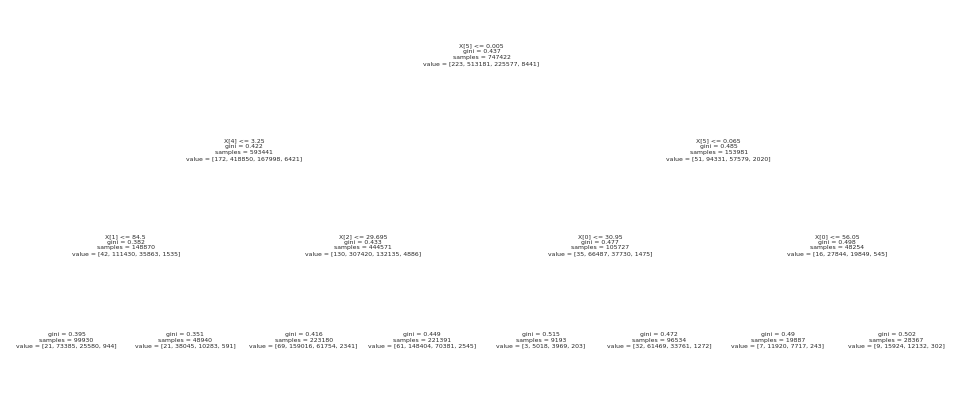

In [22]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(training_X, training_y)
tree.plot_tree(clf)

We graph the decision tree below. The Gini refers to the misclassification of whether a person will crash or not. So the way the decision tree classifier decides whether or not the classification is better is by the gini gain. This is calculated by subtracting the gini from parent tree, which would determine the gini gained. So a higher gini gain means there is a better split.

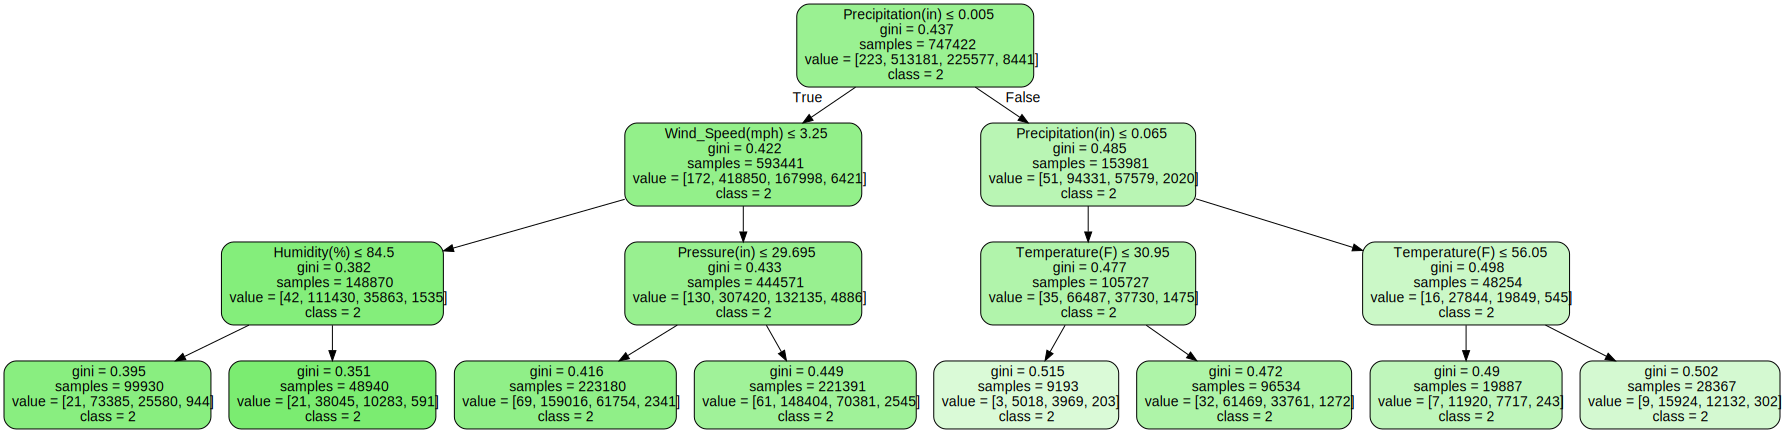

In [23]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=df.columns[1:7], class_names=[str(i) for i in range(1,5)], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

We then determine the importance of certain features in splitting the data into categories for the Decision Tree Classifier. From the plot below, we see that the precipitation has the highes effect on the severity of an accident with 61.8%
Therefore, we can say that the precipitation was the major factor that gave us a 76% accuracy in determining the severity of a crash. While visibily in miles had no affect in determining this severity.

This also shows why uniform weights in K-nearest neighbors had better testing accuracy than distance.

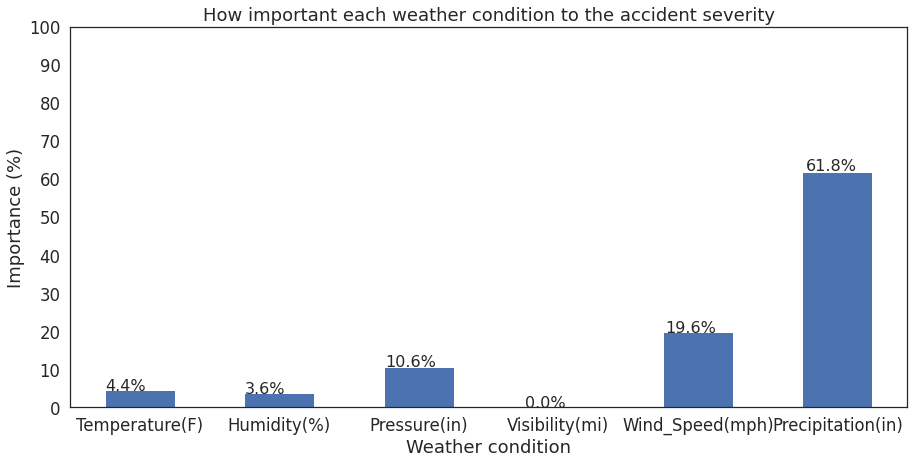

In [40]:
importance = pd.DataFrame({'feature':training_X.columns, 'importance':np.round(clf.feature_importances_,3)})
#importance = importance.sort_values('importance', ascending= False)
importance['importance'] = [round(e*100,1) for e in importance['importance'] ]

inforPlot = importance.plot(kind='bar', x='feature', y='importance',legend=None,rot=0, figsize=(15,7))
inforPlot.set_title('How important each weather condition to the accident severity')
inforPlot.set_ylabel('Importance (%)')
inforPlot.set_xlabel('Weather condition')
for p in inforPlot.patches:
    inforPlot.annotate(str(p.get_height())+'%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

plt.yticks(range(0,101,10))
plt.show()

# Ethics & Privacy

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data itself has been processed in a way to be as quantitative and fair as possible. As the data has been released by the US to the public for use, our data is reputable. The number of entries in the dataset ensures that the coverage is wide enough with less bias or too many outliers. As we have ultimately used data that has almost a million rows, our data minimizes the bias as much as possible and gives a fair representation of the population. In addition, as our data only keeps track of accidents that actually occurred, the data does not discriminate against any specific groups. The geographical locations were already replaced with latitude and longitude, so it is hard to track the places where accidents happened and protects the privacy of those involved. Moreover, we have ensured to protect the privacy of the individuals who have been involved in these traffic accidents as the datasets do not have any personal information such as name and are hard to track to any individual involved as only the information about the traffic accident such as weather conditions and date was recorded. Since we are interested in predicting the severity of traffic accidents from weather conditions, we only kept the columns which helped us and removed all other columns. Furthermore, we have ensured that we will conduct our research in an ethical manner as we have only removed rows which had missing entries and did not alter any data even if it did not give us the best results. Also, by explaining how we analyzed the data each step of the way, we have ensured that our research is replicable. Finally, our study has minimized any potential harm to any individuals as we have just analyzed how different weather conditions can affect car accidents and predicted how accurately we could predict the severity of the accidents in order to bring to light the dangers of different weather conditions in potential traffic accidents; we have not made any specific conclusions regarding any specific groups of individuals in our study. Therefore, we have fully conducted research within ethical guidelines of data science in order to generate accurate and unbiased results to the best of our abilities. 


# Conclusion & Discussion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With the results of our analysis above, we can conclude that weather conditions predict the severity of an accident to some degree, with some factors weighing in more than others. We have found precipitation to be a significant variable in our prediction through our decision tree model. Our findings support other works done in this area: the condition of the road (wet or dry) heavily affects driving ability and causes accidents. Wet roads reduce friction between the tires and the road, lengthening the stop distances of the vehicles. Self-evidently, dry roads offer the opposite, resulting in a lesser likelihood of an accident due to shorter stop distances. Our findings also found that factors such as wind speed, temperature, and pressure also play a role in predicting the severity of an accident. On the other hand, our model shows that there is no direct correlation between visibility and the severity of accidents. Our findings tell us that it is crucial to be even more focused while driving under rainy clouds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Where our prediction falls short is in accuracy. Using uniform weights with our nearest-K model, we achieved 76% accuracy with our test data after being trained. After adjusting parameters in our model this is the closest our predictor can come up with. Since our focus was on weather conditions, we are aware that there might be neglected factors which also contribute to severity of accidents. However, the results have successfully proved our hypothesis and we now have insight on how weather conditions affect the severity of accidents in the United States.


# Team Contributions

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We all worked together on all the parts of the project together in our weekly Zoom meetings as we believe that it is important to always work together on the same tasks so we can all stay on the same page and help one another whenever problems arise right away. By doing so, we were able to complete the project successfully and were able to help each other whenever one of our group members stayed behind. Thus, we have all worked together in all the parts of the project.